# YOLOv8 Instance Segmentation On Costum Dataset 

### Data and Directories

We collected 20 watermelons, 20 blackberries and 20 pineapples images and created a dataset of fruits.   

In annotation and data augmentation steps, to save time and for the sake of simplicity, we used roboflow.com in order to annotate segments of objects and augment data. "LabelImg" tool is a good alternatives but takes a lot of times in annotating segments of images.

Before training and testing our model we should organise the dataset directory. The correct way of organizing dataset directories in multiclass instance segmentation is as follows.

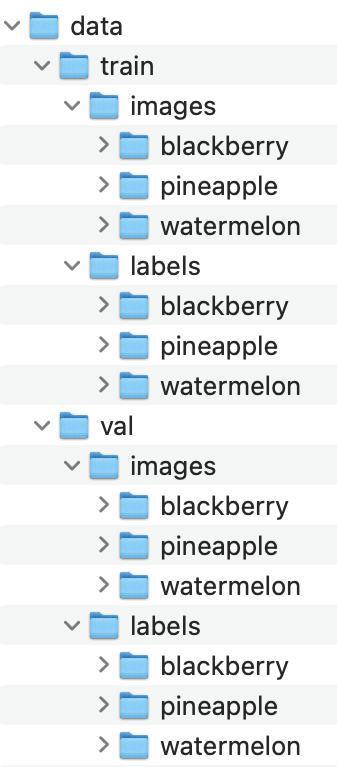

In [45]:
from PIL import Image

data = Image.open('data structure.jpeg')
data

As shown below, the main directory should include these 4 files: data, runs, train.yaml and yolov8m-seg.pt.

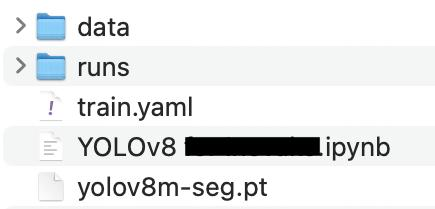

In [46]:
files = Image.open('other directories.jpeg')
files

"train.yaml" file should include the structure of the data.

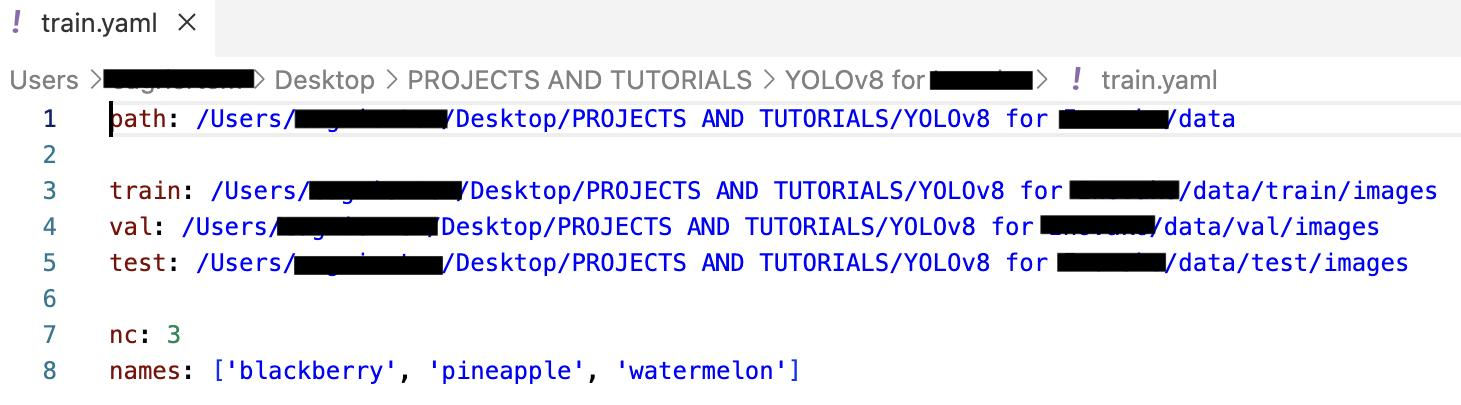

In [42]:
train_yaml = Image.open('train.yaml structure.jpeg')
train_yaml

### Prediction Algorithm
Now let us start with importing required libraries.

In [38]:
from ultralytics import YOLO
import random
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import os
import csv
from skimage import io
from skimage.io import imread, imshow
import io
import cv2
import imageio.v2 as imageio

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt") # loading a pretrained model

results = model.train(batch=5, data="train.yaml", epochs=15, imgsz=120) #training


New https://pypi.org/project/ultralytics/8.0.153 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.152 🚀 Python-3.10.12 torch-2.0.1 CPU (Apple M1)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=train.yaml, epochs=15, patience=50, batch=5, imgsz=120, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

In [5]:
model.val()

Ultralytics YOLOv8.0.152 🚀 Python-3.10.12 torch-2.0.1 CPU (Apple M1)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients
val: Scanning /Users/cagriertem/Desktop/PROJECTS AND TUTORIALS/YOLOv8 for Inovak
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         15         73      0.701      0.471      0.608      0.391       0.83      0.434      0.592      0.383
            blackberry         15         24      0.865      0.535      0.786      0.499      0.941      0.458      0.771      0.495
             pineapple         15         18      0.322      0.167      0.222      0.165      0.553      0.167      0.232      0.173
            watermelon         15         31      0.917      0.711      0.817      0.509      0.994      0.677      0.772      0.481
Speed: 0.3ms preprocess, 7.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/segment/val5


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2b070f820>
fitness: 0.8166357909414954
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([     0.9938,     0.33855,     0.98995])
names: {0: 'blackberry', 1: 'pineapple', 2: 'watermelon'}
plot: True
results_dict: {'metrics/precision(B)': 0.7014206533830691, 'metrics/recall(B)': 0.4709620943996942, 'metrics/mAP50(B)': 0.607922800460399, 'metrics/mAP50-95(B)': 0.39105393827133933, 'metrics/precision(M)': 0.8295603726459221, 'metrics/recall(M)': 0.4341397849462365, 'metrics/mAP50(M)': 0.5915204237650948, 'metrics/mAP50-95(M)': 0.3830476934163784, 'fitness': 0.8166357909414954}
save_dir: PosixPath('runs/segment/val5')
seg: ultralytics

In [78]:
#model.predict(source="/Users/cagriertem/Desktop/PROJECTS AND TUTORIALS/YOLOv8 for Inovako/data/test/images/blackberry")

In [6]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category

Ultralytics YOLOv8.0.152 🚀 Python-3.10.12 torch-2.0.1 CPU (Apple M1)
val: Scanning /Users/cagriertem/Desktop/PROJECTS AND TUTORIALS/YOLOv8 for Inovak
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         15         73      0.701      0.471      0.608      0.391       0.83      0.434      0.592      0.383
            blackberry         15         24      0.865      0.535      0.786      0.499      0.941      0.458      0.771      0.495
             pineapple         15         18      0.322      0.167      0.222      0.165      0.553      0.167      0.232      0.173
            watermelon         15         31      0.917      0.711      0.817      0.509      0.994      0.677      0.772      0.481
Speed: 0.3ms preprocess, 8.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/segment/val6


array([    0.49472,     0.17339,     0.48103])

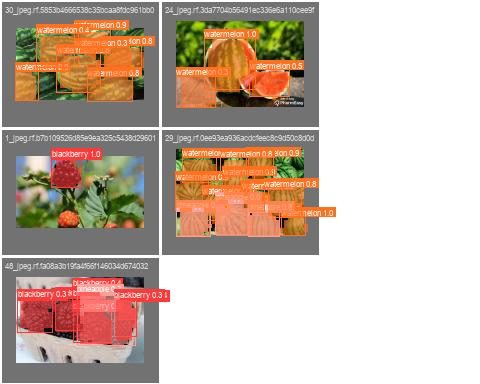

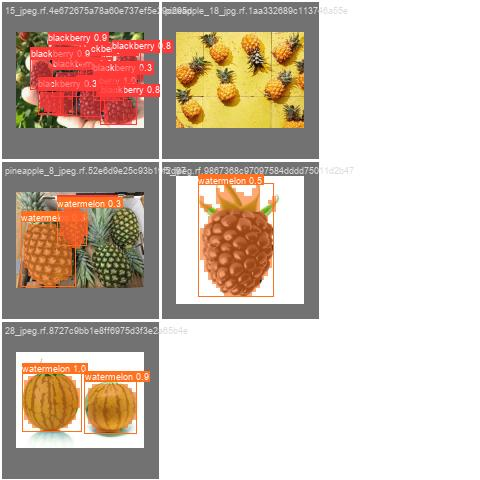

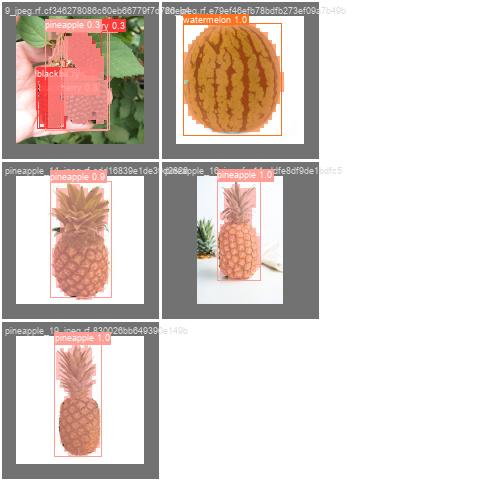

In [35]:
from PIL import Image
from IPython.display import display

# Load image
batch0 = Image.open('/Users/cagriertem/Desktop/PROJECTS AND TUTORIALS/YOLOv8 for Inovako/runs/segment/val6/val_batch0_pred.jpg')
batch1 = Image.open('/Users/cagriertem/Desktop/PROJECTS AND TUTORIALS/YOLOv8 for Inovako/runs/segment/val6/val_batch1_pred.jpg')
batch2 = Image.open('/Users/cagriertem/Desktop/PROJECTS AND TUTORIALS/YOLOv8 for Inovako/runs/segment/val6/val_batch2_pred.jpg')

# Display image
display(batch0)
display(batch1)
display(batch2)

In [47]:
precision = 0.7
recall = 0.41
f1score = 2 * (precision * recall) / (precision + recall)
print("Precision: {}, Recall: {}, F1 Score: {}".format(precision, recall, f1score))

Precision: 0.7, Recall: 0.41, F1 Score: 0.5171171171171172


Although the results are lower than expected, the algorithm works perfectly!

Algorithm seems to predict poorly the pineapple images, the precision score of this category is 0.32. On the other hand, the precision scores of watermelon and blackberries are good, respectively 0.91 and 0.86. 

To conclude, the results are lower than expected but still pretty good at this initial steps. Precision score, recall and f1 score will be improved as more data will be collected.